# **1. Tree 유형 모형**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from os import system  # Tree 시각화를 위함
system("pip install graphviz")
import graphviz

### **1.1. 데이터 로드**

In [ ]:
# 유방암 데이터 로드 
cancer = load_breast_cancer()

# 유방암 데이터 DataFrame으로 변환
cancerDF = pd.DataFrame(cancer.data, columns = cancer.feature_names)

In [ ]:
# 유방암 데이터의 타겟 변수와 정의 (1이면 양성 종양, 0이면 악성 종양)
cancerDF['diagnosis'] = cancer.target
# 보통 1을 주요 타겟이 되는 범주로 정의함 
cancerDF['diagnosis'] = np.where(cancerDF['diagnosis'] == 0, 1, 0)
cancerDF.shape
cancerDF.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,1
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,1
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,1
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,1
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,1


### **1.2. 데이터 시각화**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


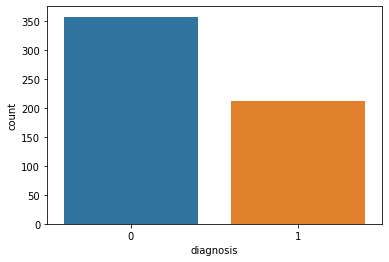

In [ ]:
# 진단 결과에 대한 분포 확인
sns.countplot(cancerDF['diagnosis'])

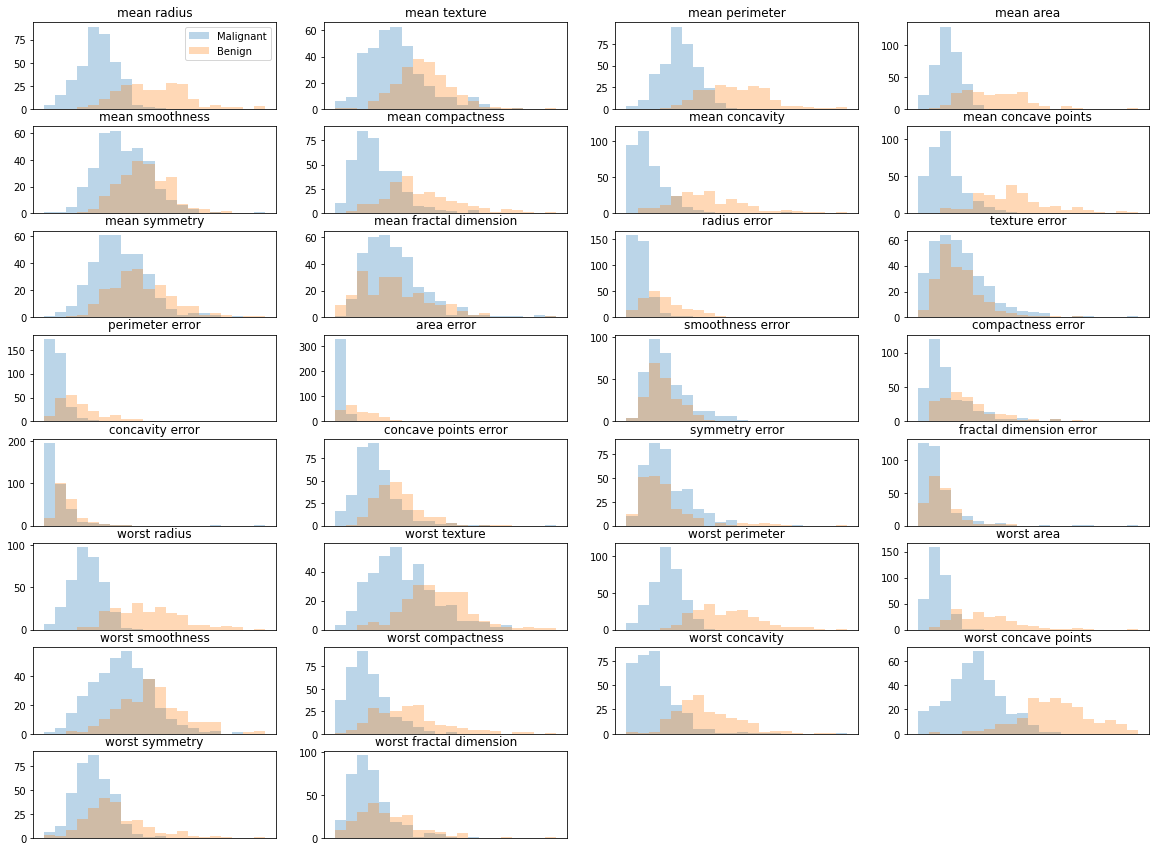

In [ ]:
# 양성 / 음성별 설명 변수의 분포 확인 
plt.figure(figsize=[20,15])

malignant = cancerDF[cancerDF.diagnosis==0]
benign = cancerDF[cancerDF.diagnosis==1]

# 설명 변수 데이터 set
X_data = cancerDF.drop("diagnosis", axis = 1, inplace = False)

# 히스토그램을 활용한 모든 설명 변수에 대한 분포 확인
for col in range(30):
    plt.subplot(8,4,col+1)
    _, bins=np.histogram(X_data.iloc[:,col], bins=20)

    plt.hist(malignant.iloc[:,col],bins=bins, alpha=0.3)
    plt.hist(benign.iloc[:,col], bins=bins ,alpha=0.3)
    plt.title(X_data.columns[col])
    if col==0: plt.legend(['Malignant', 'Benign'])
    plt.xticks([])

# **2. 의사 결정 나무(Decision Tree)**

In [ ]:
from sklearn import tree

# 타겟 변수 
y_target = cancerDF['diagnosis']

# 의사결정나무(Decision Tree) 모형 생성
DTree = tree.DecisionTreeClassifier(random_state=300)
DTree.fit(X_data, y_target)

DecisionTreeClassifier(random_state=300)

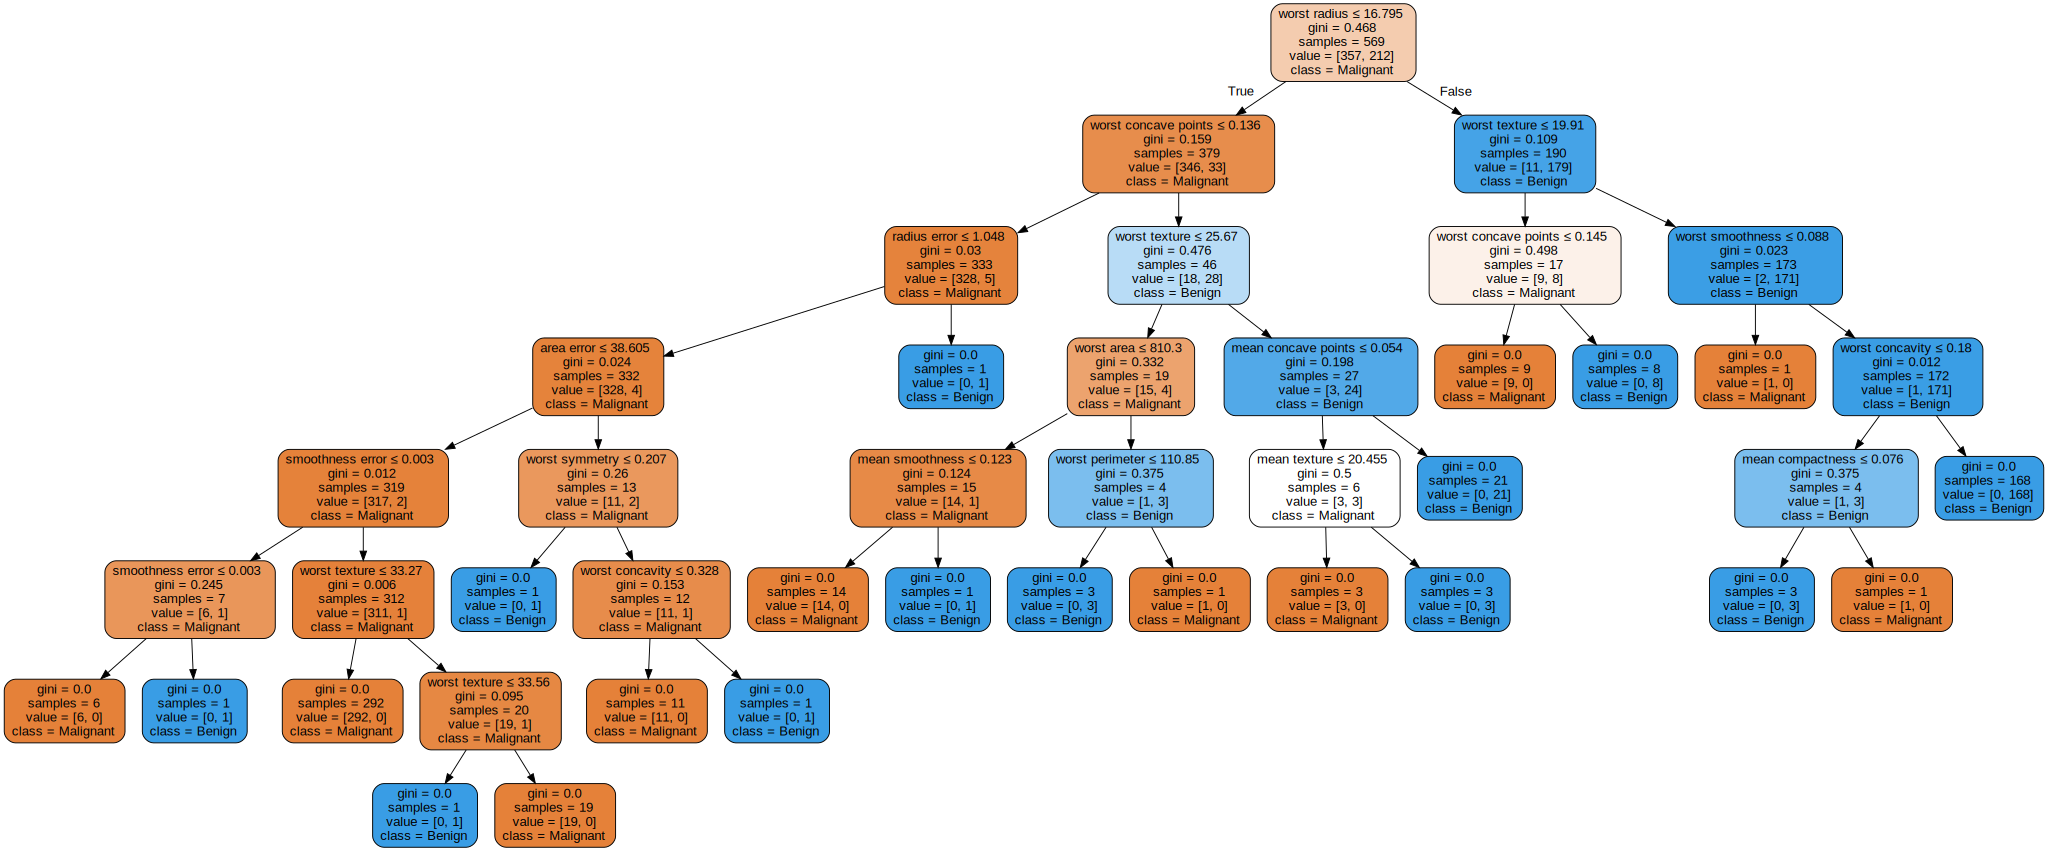

In [ ]:
# Decision Tree 그래프로 확인
dot_data = tree.export_graphviz(DTree, 
                               out_file = None,                       # file로 변환하지 않음
                               feature_names = X_data.columns,        # 변수명
                               class_names = ['Malignant', 'Benign'], # 타겟 종류
                               filled = True,                         # 색상 채움
                               rounded = True,                        # 반올림 함
                               special_characters = True)             # 특수 문자 사용함

graph = graphviz.Source(dot_data)              
graph

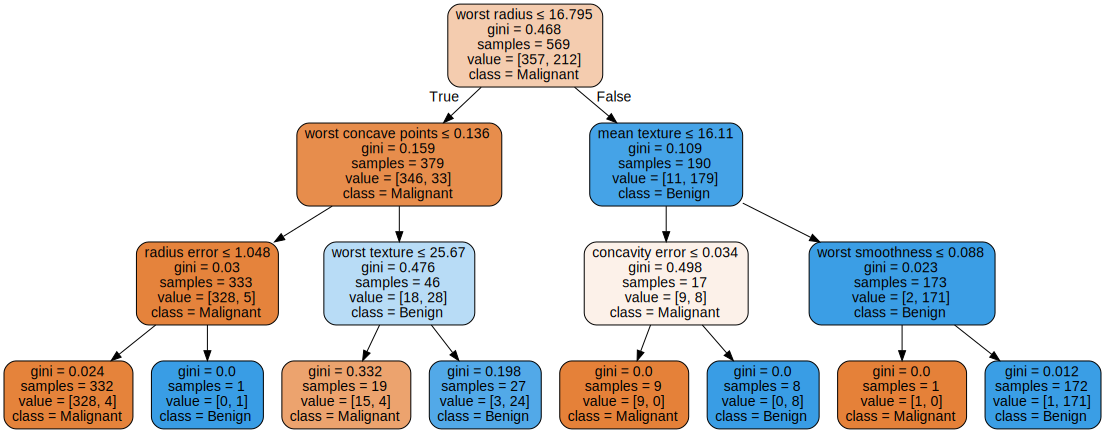

In [ ]:
# 의사결정나무(Decision Tree) 모형 생성 (depth 3으로 조절)
DTree_depth3 = tree.DecisionTreeClassifier(random_state=300, max_depth = 3)
DTree_depth3.fit(X_data, y_target)

# Decision Tree 그래프로 확인 (depth 3으로 조절)
dot_data3 = tree.export_graphviz(DTree_depth3, 
                                  out_file = None,                       # file로 변환하지 않음
                                  feature_names = X_data.columns,        # 변수명
                                  class_names = ['Malignant', 'Benign'], # 타겟 종류
                                  filled = True,                         # 색상 채움
                                  rounded = True,                        # 반올림 함
                                  special_characters = True)             # 특수 문자 사용함

graph3 = graphviz.Source(dot_data3)              
graph3

In [ ]:
# 타겟 변수 예측 (depth를 주지 않은 것과, 준 것 비교)
y_preds = DTree.predict(X_data)
y_preds3 = DTree_depth3.predict(X_data)

# 예측값 비교 
pd.DataFrame({'y_target' : y_target,'y_preds' : y_preds, 'y_preds3' : y_preds3})

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
from sklearn.metrics import confusion_matrix
print("Depth 제한 없는 의사결정 나무 결과")
pd.DataFrame(confusion_matrix(y_target, y_preds))
print("\n")
print("Depth를 3으로 제한한 의사결정 나무 결과")
pd.DataFrame(confusion_matrix(y_target, y_preds3))

Depth 제한 없는 의사결정 나무 결과


,0,1
0,357,0
1,0,212




Depth를 3으로 제한한 의사결정 나무 결과


,0,1
0,353,4
1,8,204


# **3. 랜덤 포레스트 (Random Forest)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 100개의 decision tree를 사용한 랜덤 포레스트 (max_features는 sqrt개수를 사용하는 것이 디폴트임)
RF = RandomForestClassifier(n_estimators=100, random_state=0)
RF.fit(X_data, y_target)

# 예측값 생성 
y_preds_RF = RF.predict(X_data)

# 예측값 비교 
pd.DataFrame({'y_target' : y_target,'y_preds' : y_preds, 'y_preds3' : y_preds3, 'y_preds_RF' : y_preds_RF})

RandomForestClassifier(random_state=0)

,y_target,y_preds,y_preds3,y_preds_RF
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
564,1,1,1,1
565,1,1,1,1
566,1,1,1,1
567,1,1,1,1


In [ ]:
pd.DataFrame(confusion_matrix(y_target, y_preds_RF))

,0,1
0,357,0
1,0,212


In [ ]:
# 의사 결정 나무와 랜덤 포레스트의 결과 비교 

from sklearn.metrics import confusion_matrix
print("Depth 제한 없는 의사결정 나무 결과")
pd.DataFrame(confusion_matrix(y_target, y_preds))
print("\n")
print("Depth를 3으로 제한한 의사결정 나무 결과")
pd.DataFrame(confusion_matrix(y_target, y_preds3))
print("\n")
print("랜덤 포레스트 결과(100 개의 tree 사용)")
pd.DataFrame(confusion_matrix(y_target, y_preds3))

Depth 제한 없는 의사결정 나무 결과


,0,1
0,357,0
1,0,212




Depth를 3으로 제한한 의사결정 나무 결과


,0,1
0,353,4
1,8,204




랜덤 포레스트 결과(100 개의 tree 사용)


,0,1
0,353,4
1,8,204
